# About Dataset

link https://www.kaggle.com/datasets/varishabatool/disorder


The Sleep Disorder Diagnosis Dataset or Sleep Health and Lifestyle Dataset contains 374 rows and 13 columns, capturing details about sleep patterns, lifestyle habits, and related health indicators. It was designed to support research and educational purpose .

## Imports

In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


import kagglehub

## Load the data


In [2]:
# Download latest version
path = kagglehub.dataset_download("varishabatool/disorder")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'disorder' dataset.
Path to dataset files: /kaggle/input/disorder


In [3]:
print(os.listdir(path))

['Sleep_health_and_lifestyle_dataset.csv']


In [4]:
df = pd.read_csv(os.path.join(path,'Sleep_health_and_lifestyle_dataset.csv'))

## Explore The Data


In [30]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Accountant,Occupation_Doctor,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic Blood Pressure,Diastolic Blood Pressure,Sleep_Quality_Category
0,1,27,6.1,6,42,6,77,4200,0,0,...,0,1,0,0,0,0,1,126,83,2
1,1,28,6.2,6,60,8,75,10000,0,1,...,0,0,0,1,0,0,0,125,80,2
2,1,28,6.2,6,60,8,75,10000,0,1,...,0,0,0,1,0,0,0,125,80,2
3,1,28,5.9,4,30,8,85,3000,0,0,...,0,0,0,0,0,1,0,140,90,3
4,1,28,5.9,4,30,8,85,3000,0,0,...,0,0,0,0,0,1,0,140,90,3


In [21]:
df.shape   # data is not that much hence we can carry with ml algos

(374, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [9]:
df.duplicated().sum()


np.int64(0)

In [17]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

## Visualize Tha Data

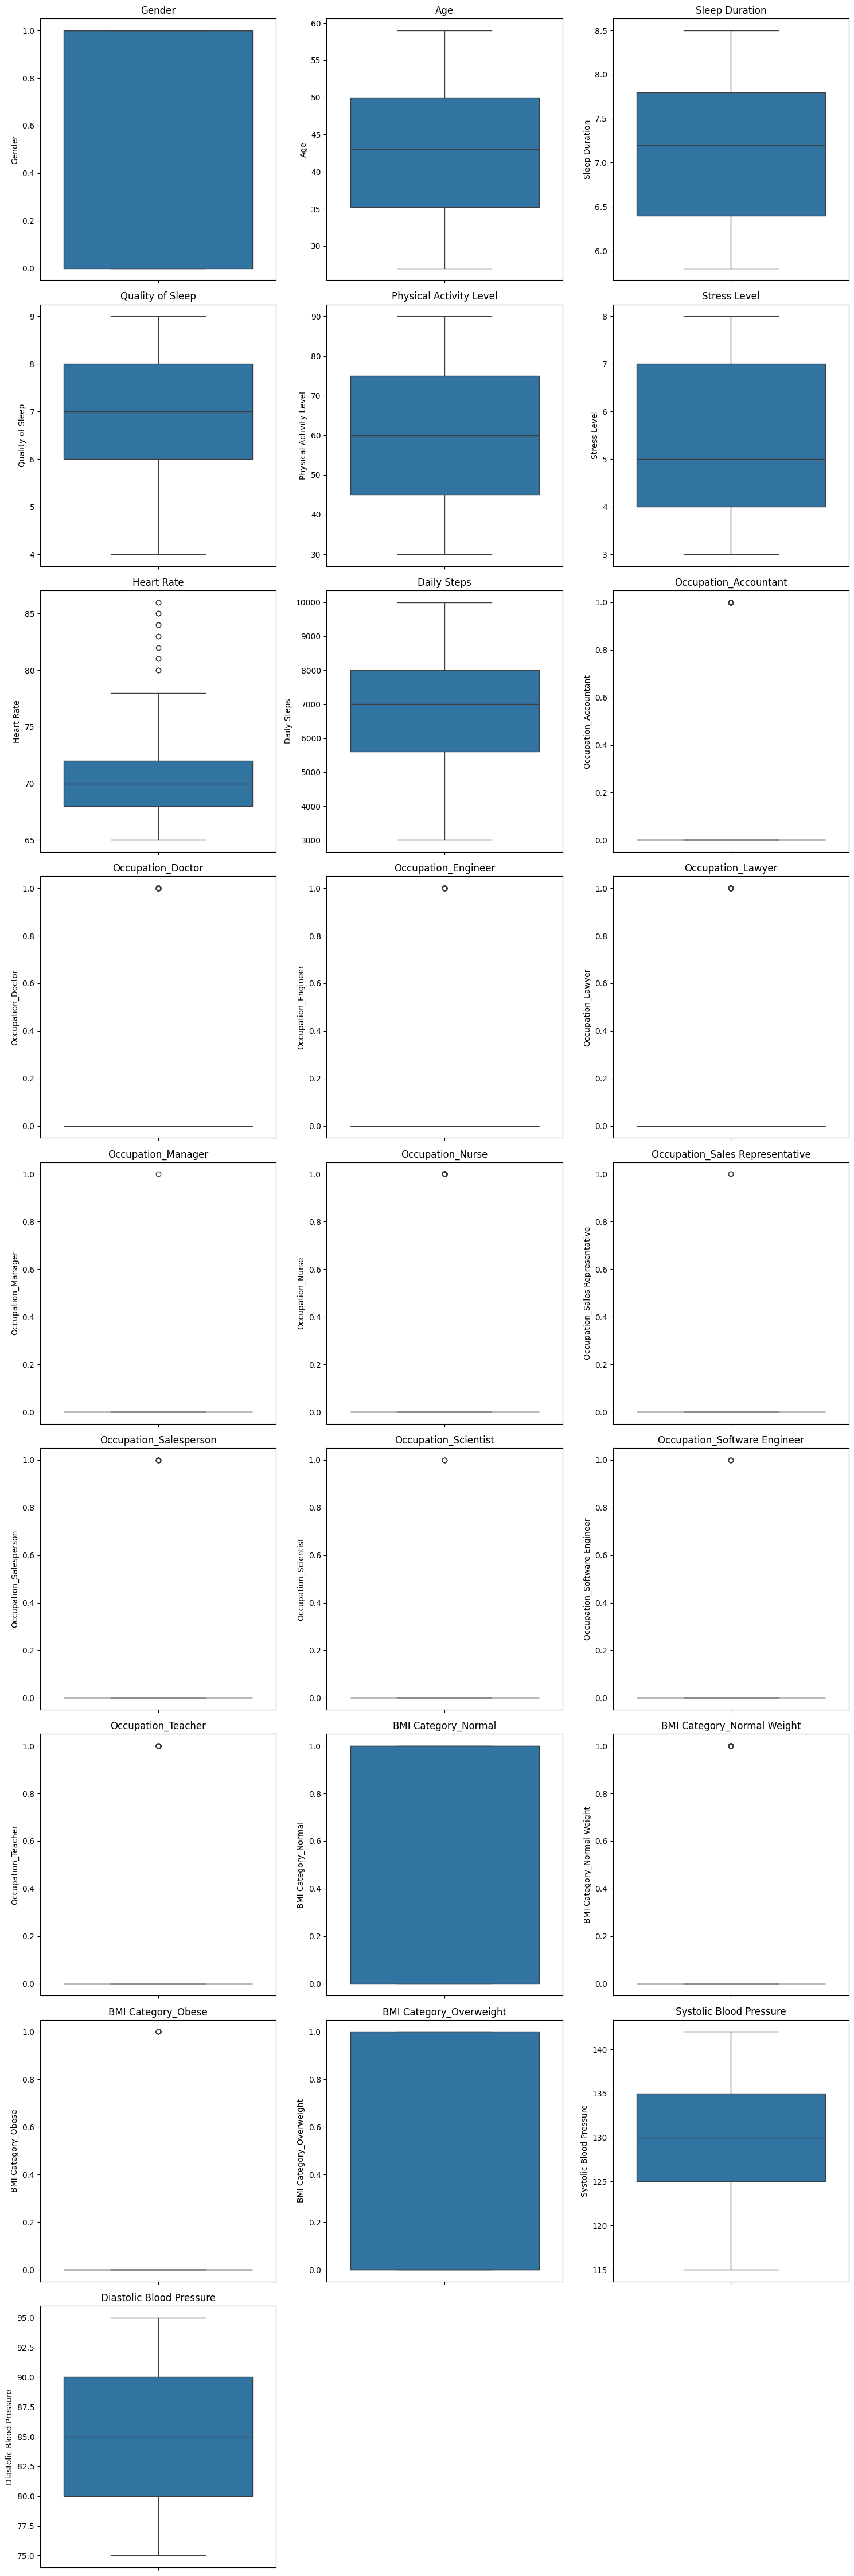

In [27]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for numerical columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # Calculate number of rows needed
plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Preprocessing

In [11]:
df = df.drop("Sleep Disorder",axis=1)

In [12]:
df = df.drop("Person ID",axis=1)

In [13]:
df['Gender'] = df['Gender'].apply(lambda x : 1 if x == "Male"  else 0)

In [19]:
cat_cols = ['Occupation','BMI Category']

# Create dummy variables for the specified categorical columns
dummy = pd.get_dummies(df[cat_cols]).astype(int)

# Concatenate the dummy variables to the original DataFrame
df = pd.concat([df, dummy], axis=1)

# Drop the original categorical columns
df = df.drop(cat_cols, axis=1)

In [22]:
# Split 'Blood Pressure' into 'Systolic Blood Pressure' and 'Diastolic Blood Pressure'
df[['Systolic Blood Pressure', 'Diastolic Blood Pressure']] = df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to integer type
df['Systolic Blood Pressure'] = df['Systolic Blood Pressure'].astype(int)
df['Diastolic Blood Pressure'] = df['Diastolic Blood Pressure'].astype(int)

# Drop the original 'Blood Pressure' column
df = df.drop('Blood Pressure', axis=1)

In [28]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9])

In [29]:
def categorize_sleep_quality(quality):
    if quality in [8, 9]:
        return 1
    elif quality in [6, 7]:
        return 2
    else:
        return 3

df['Sleep_Quality_Category'] = df['Quality of Sleep'].apply(categorize_sleep_quality)

display(df[['Quality of Sleep', 'Sleep_Quality_Category']].head())

,Quality of Sleep,Sleep_Quality_Category
0,6,2
1,6,2
2,6,2
3,4,3
4,4,3


In [31]:
df = df.drop('Quality of Sleep',axis=1)

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split


X = df.drop('Sleep_Quality_Category',axis=1)
y = df["Sleep_Quality_Category"]


X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state=42)

In [35]:
y

,Sleep_Quality_Category
0,2
1,2
2,2
3,3
4,3
...,...
369,1
370,1
371,1
372,1


In [34]:
from sklearn.preprocessing import RobustScaler

# Select numerical columns (excluding the target variable if it's numerical)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the numerical columns of the training and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

display(X_train.head())

,Gender,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,...,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic Blood Pressure,Diastolic Blood Pressure
222,1.0,0.071429,-0.692308,-0.5,0.666667,0.5,-0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
227,1.0,0.071429,-0.692308,-0.5,0.666667,0.5,-0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0
141,1.0,-0.357143,-0.076923,0.0,0.000000,-0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,-1.000000,-0.923077,-1.0,1.000000,0.0,0.5,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.5
246,1.0,0.071429,-0.692308,-0.5,0.666667,0.5,-0.5,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0


## Basic Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF = RandomForestClassifier(max_depth=6)

RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)

## Confusion_matrix

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[42  0  0]
 [ 0 48  0]
 [ 0  0  4]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        48
           3       1.00      1.00      1.00         4

    accuracy                           1.00        94
   macro avg       1.00      1.00      1.00        94
weighted avg       1.00      1.00      1.00        94



## Overfitting Check

In [45]:
from sklearn.metrics import accuracy_score

# Make predictions on the training set
y_train_pred = RF.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the test set (already calculated as 'accuracy')
test_accuracy = accuracy

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# You can compare these two values to check for overfitting.
# A large difference between training and test accuracy might indicate overfitting.

Training Accuracy: 1.0
Test Accuracy: 1.0
